In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# Source https://github.com/yutkin/lenta.ru-news-dataset

import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/Data/News/Common/lenta-ru-news.csv')
df.head()

<ipython-input-2-9f009ad41d1e>:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Final/lenta-ru-news.csv')


,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18


In [ ]:
df.date = pd.to_datetime(df.date)
df['year'] = df.date.dt.year
df = df.drop(df[(df.year == 1914)|(df.year == 1999)].index)
print(df.text.isna().sum())
df.dropna(subset=['text'], inplace=True)

5


In [ ]:
df.shape

(797884, 7)

In [ ]:
df.year.value_counts()

2016    63107
2019    59729
2017    58792
2009    51343
2008    50389
2012    46047
2011    44822
2015    44766
2010    44587
2018    43951
2013    43297
2014    38075
2007    36029
2006    35960
2005    30718
2004    24386
2002    22179
2001    21974
2003    21557
2000    16176
Name: year, dtype: int64

In [ ]:
df.year.value_counts() / df.shape[0]

2016    0.079093
2019    0.074859
2017    0.073685
2009    0.064349
2008    0.063153
2012    0.057711
2011    0.056176
2015    0.056106
2010    0.055882
2018    0.055084
2013    0.054265
2014    0.047720
2007    0.045156
2006    0.045069
2005    0.038499
2004    0.030563
2002    0.027797
2001    0.027540
2003    0.027018
2000    0.020274
Name: year, dtype: float64

In [ ]:
df.year.value_counts().mean()

39894.2

In [ ]:
df.topic.value_counts()

Россия               158905
Мир                  135828
Экономика             79077
Спорт                 64413
Культура              53796
Бывший СССР           53402
Наука и техника       53136
Интернет и СМИ        44362
Из жизни              27605
Дом                   21734
Силовые структуры     19596
Ценности               7766
Бизнес                 7399
Путешествия            6408
69-я параллель         1268
Крым                    666
Культпросвет            340
Легпром                 114
Библиотека               60
Оружие                    3
ЧМ-2014                   2
МедНовости                1
Сочи                      1
Name: topic, dtype: int64

In [ ]:
! pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 51.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=f50dd305bd01ae1293f5c986fb9d64e3b383e069bead3c9216b9020faac944ae
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import pymorphy2

nltk.download('punkt')
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('russian'))

morph = pymorphy2.MorphAnalyzer()

# Clean and tokenize text, remove stopwords
def preprocess_text(df):
    df['clean_text'] = df.text.str.lower()
    df['clean_text'] = df.clean_text.str.replace(re.compile("[^а-яА-Я0-9]+"), ' ')
    df['clean_text'] = df.clean_text.str.replace('\s+', ' ')
    df['clean_text'] = df.clean_text.str.strip()

    print(f'Null text values: {df.clean_text.isna().sum()}')
    if df.clean_text.isna().sum() > 0:
        df.dropna(subset=['clean_text'], inplace=True)

    print('Tokenize text')
    df['tokenized_text'] = df.clean_text.apply(lambda x: word_tokenize(x))
    df['tokenized_text'] = df.tokenized_text.apply(lambda x: [w for w in x if w not in STOPWORDS]) 

    print('Lemmatize text')
    df['lemmas'] = df['tokenized_text'].apply(lambda x: [morph.parse(w)[0].normal_form for w in x])
    return df[['title', 'year', 'tokenized_text', 'lemmas', 'tags', 'topic']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from tqdm import tqdm

years = df.year.unique()

for year in tqdm(years):
    print(f'Preprocess texts for {year} year')
    df_year = df[df.year == year].copy()
    df_year = preprocess_text(df_year)
    print(f'Save dataframe for {year} year')
    compression_opts = dict(method='zip', archive_name=f'data_{year}.csv') 
    df_year.to_csv(f'/content/gdrive/MyDrive/Colab Notebooks/Thesis/Data/News/Common/data_{year}.csv', index=False, compression=compression_opts)

  0%|          | 0/19 [00:00<?, ?it/s]

Preprocess texts for 2001 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2001 year


  5%|▌         | 1/19 [08:19<2:29:47, 499.32s/it]

Preprocess texts for 2002 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2002 year


 11%|█         | 2/19 [18:06<2:36:11, 551.25s/it]

Preprocess texts for 2003 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2003 year


 16%|█▌        | 3/19 [28:24<2:35:06, 581.67s/it]

Preprocess texts for 2004 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2004 year


 21%|██        | 4/19 [40:40<2:40:39, 642.66s/it]

Preprocess texts for 2005 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2005 year


 26%|██▋       | 5/19 [56:36<2:56:16, 755.46s/it]

Preprocess texts for 2006 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2006 year


 32%|███▏      | 6/19 [1:13:11<3:01:18, 836.81s/it]

Preprocess texts for 2007 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2007 year


 37%|███▋      | 7/19 [1:28:50<2:54:02, 870.20s/it]

Preprocess texts for 2008 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2008 year


 42%|████▏     | 8/19 [1:50:30<3:04:39, 1007.21s/it]

Preprocess texts for 2009 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2009 year


 47%|████▋     | 9/19 [2:16:05<3:15:22, 1172.27s/it]

Preprocess texts for 2010 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2010 year


 53%|█████▎    | 10/19 [2:38:53<3:04:53, 1232.61s/it]

Preprocess texts for 2011 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2011 year


 58%|█████▊    | 11/19 [3:01:49<2:50:12, 1276.61s/it]

Preprocess texts for 2012 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2012 year


 63%|██████▎   | 12/19 [3:26:41<2:36:33, 1341.86s/it]

Preprocess texts for 2013 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2013 year


 68%|██████▊   | 13/19 [3:50:28<2:16:47, 1367.92s/it]

Preprocess texts for 2014 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2014 year


 74%|███████▎  | 14/19 [4:09:55<1:48:55, 1307.05s/it]

Preprocess texts for 2015 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2015 year


 79%|███████▉  | 15/19 [4:34:05<1:30:00, 1350.21s/it]

Preprocess texts for 2016 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2016 year


 84%|████████▍ | 16/19 [5:04:33<1:14:41, 1493.97s/it]

Preprocess texts for 2017 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2017 year


 89%|████████▉ | 17/19 [5:30:26<50:23, 1511.80s/it]  

Preprocess texts for 2018 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2018 year


 95%|█████████▍| 18/19 [5:50:27<23:38, 1418.38s/it]

Preprocess texts for 2019 year


<ipython-input-8-c84b67b8bd07>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df.clean_text.str.replace('\s+', ' ')


Null text values: 0
Tokenize text
Lemmatize text
Save dataframe for 2019 year


100%|██████████| 19/19 [6:18:04<00:00, 1193.92s/it]


In [ ]:
import pandas as pd
from ast import literal_eval
from gensim.models import Word2Vec
from tqdm import tqdm

# Train and save Word2vec models per each year
years = [i for i in range(2000, 2020)]
for year in tqdm(years):
    df_temp = pd.read_csv(f'/content/gdrive/MyDrive/Colab Notebooks/Thesis/Data/News/Common/data_{year}.csv', compression='zip',
                   converters={'tokenized_text': literal_eval, 'lemmas': literal_eval})
    model = Word2Vec(sentences=df_temp.lemmas, vector_size=300, window=5, min_count=50, 
                 sg=1, negative=5, ns_exponent=0.75, workers=4)
    model.save(f'/content/gdrive/MyDrive/Colab Notebooks/Thesis/Models/News/Word2vec/word2vec_{year}.model')

100%|██████████| 19/19 [1:30:12<00:00, 284.86s/it]


In [ ]:
# Functions for aligning word embeddings
# Source: https://gist.github.com/zhicongchen/9e23d5c3f1e5b1293b16133485cd17d8
import gensim
import numpy as np

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """
    Original script: https://gist.github.com/quadrismegistus/09a93e219a6ffc4f216fb85235535faf
    Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
        
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """

    # patch by Richard So [https://twitter.com/richardjeanso) (thanks!) to update this code for new version of gensim
    # base_embed.init_sims(replace=True)
    # other_embed.init_sims(replace=True)

    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the (normalized) embedding matrices
    base_vecs = in_base_embed.wv.get_normed_vectors()
    other_vecs = in_other_embed.wv.get_normed_vectors()

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one, i.e. multiplying the embedding matrix by "ortho"
    other_embed.wv.vectors = (other_embed.wv.vectors).dot(ortho)    
    
    return other_embed

def intersection_align_gensim(m1, m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.index_to_key)
    vocab_m2 = set(m2.wv.index_to_key)

    # Find the common vocabulary
    common_vocab = vocab_m1 & vocab_m2
    if words: common_vocab &= set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1 - common_vocab and not vocab_m2 - common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.get_vecattr(w, "count") + m2.wv.get_vecattr(w, "count"), reverse=True)
    # print(len(common_vocab))

    # Then for each model...
    for m in [m1, m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.key_to_index[w] for w in common_vocab]
        old_arr = m.wv.vectors
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.vectors = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        new_key_to_index = {}
        new_index_to_key = []
        for new_index, key in enumerate(common_vocab):
            new_key_to_index[key] = new_index
            new_index_to_key.append(key)
        m.wv.key_to_index = new_key_to_index
        m.wv.index_to_key = new_index_to_key
        
        print(len(m.wv.key_to_index), len(m.wv.vectors))
        
    return (m1,m2)

In [ ]:
from gensim.models import Word2Vec

# Align word embeddings for years 2000, 2009, and 2019 (use shared vocabulary)
years = [2000, 2009]

models_dict_2 = {}

model_2019 = Word2Vec.load('/content/gdrive/MyDrive/Colab Notebooks/Thesis/Models/News/Word2vec/word2vec_2019.model')
model_2009 = Word2Vec.load(f'/content/gdrive/MyDrive/Colab Notebooks/Thesis/Models/News/Word2vec/word2vec_2009.model')
m_2019, m_2009 = intersection_align_gensim(model_2019, model_2009)
words = m_2009.wv.key_to_index

for year in years:
    model_2019 = Word2Vec.load('/content/gdrive/MyDrive/Colab Notebooks/Thesis/Models/News/Word2vec/word2vec_2019.model')
    model_2 = Word2Vec.load(f'/content/gdrive/MyDrive/Colab Notebooks/Thesis/Models/News/Word2vec/word2vec_{year}.model')
    m_2019, m_2 = intersection_align_gensim(model_2019, model_2, words=words)
    m_2_modified = smart_procrustes_align_gensim(m_2019, m_2, words=words)
    models_dict_2[f'm_{year}_modified'] = m_2_modified
    words = m_2019.wv.key_to_index

8516 8516
8516 8516
4190 4190
4190 4190
4190 4190
4190 4190


In [ ]:
import json

with open('/content/gdrive/MyDrive/Colab Notebooks/Thesis/Data/News/Common/shared_words_news.json', 'w') as f:
    json.dump(words, f)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

# Compute cosine similarities
model_2000_modified = models_dict_2['m_2000_modified']
cosine_similarities ={}

for word in tqdm(model_2000_modified.wv.index_to_key):
    cosine_similarities[word] = cosine_similarity([model_2000_modified.wv[word]], 
                                                  [model_2019.wv[word]])[0][0]

100%|██████████| 4190/4190 [00:01<00:00, 3169.09it/s]


In [ ]:
model_2009_modified = models_dict_2['m_2009_modified']

In [ ]:
top_20 = sorted(cosine_similarities.items(), key=lambda item: item[1])[:20]

for word in top_20:
    print(word)
    print([w for w,v in model_2000_modified.wv.most_similar(word[0], topn=5)])
    print([w for w,v in model_2019.wv.most_similar(word[0], topn=5)])

('альберт', 0.22245975)
['республиканец', 'джордж', 'демократ', 'гора', 'младший']
['франциско', 'йоркский', 'джордж', 'томас', 'бин']
('видео', 0.22394714)
['телевизионный', 'документальный', 'классический', 'музыкальный', 'цифровой']
['кадр', 'запись', 'снятой', 'фотография', 'опубликовать']
('родригес', 0.26231366)
['венесуэла', 'али', 'опек', 'экспортёр', 'ливия']
['перес', 'хосе', 'кэтрин', 'хуан', 'бен']
('рогозин', 0.29252902)
['думский', 'пас', 'президиум', 'егор', 'обсе']
['байконур', 'космодром', 'мкс', 'орбитальный', 'космический']
('кстати', 0.29694915)
['итальянец', 'голландец', 'четвёрка', 'таблица', 'американка']
['господин', 'просто', 'любить', 'мы', 'думать']
('гора', 0.29807618)
['альберт', 'республиканец', 'джордж', 'демократ', 'бич']
['лавина', 'побережье', 'горный', 'окраина', 'ущелие']
('титов', 0.29917076)
['константин', 'артемьев', 'станислав', 'губернаторский', 'егор']
['уполномоченный', 'борис', 'герман', 'предприниматель', 'колесников']
('подъём', 0.30239993)

100%|██████████| 20/20 [00:21<00:00,  1.10s/it]


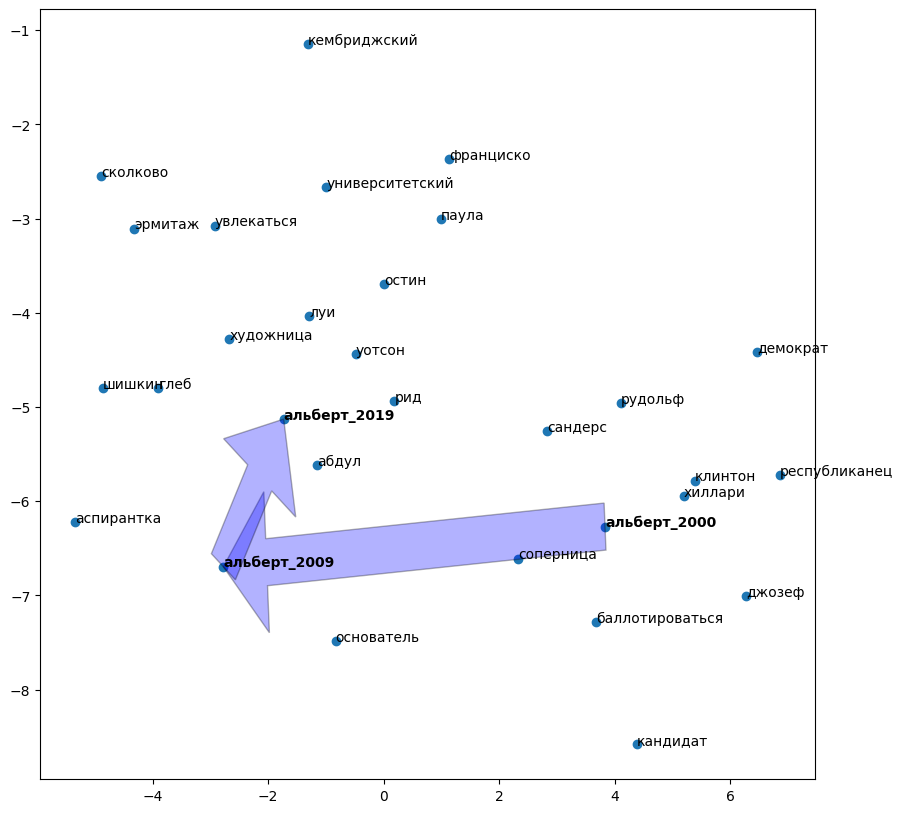

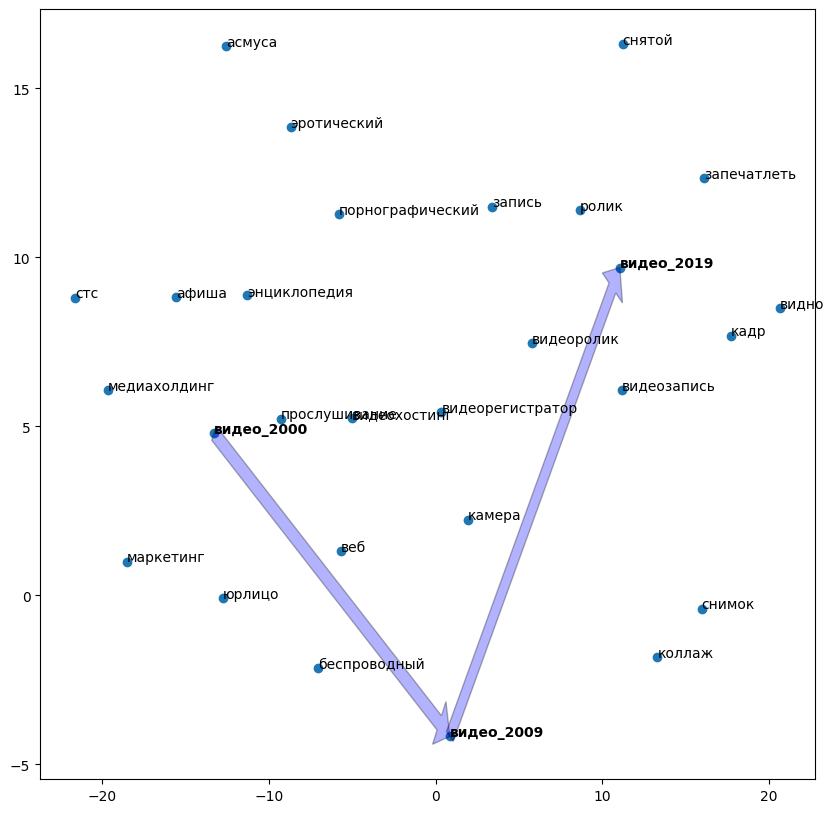

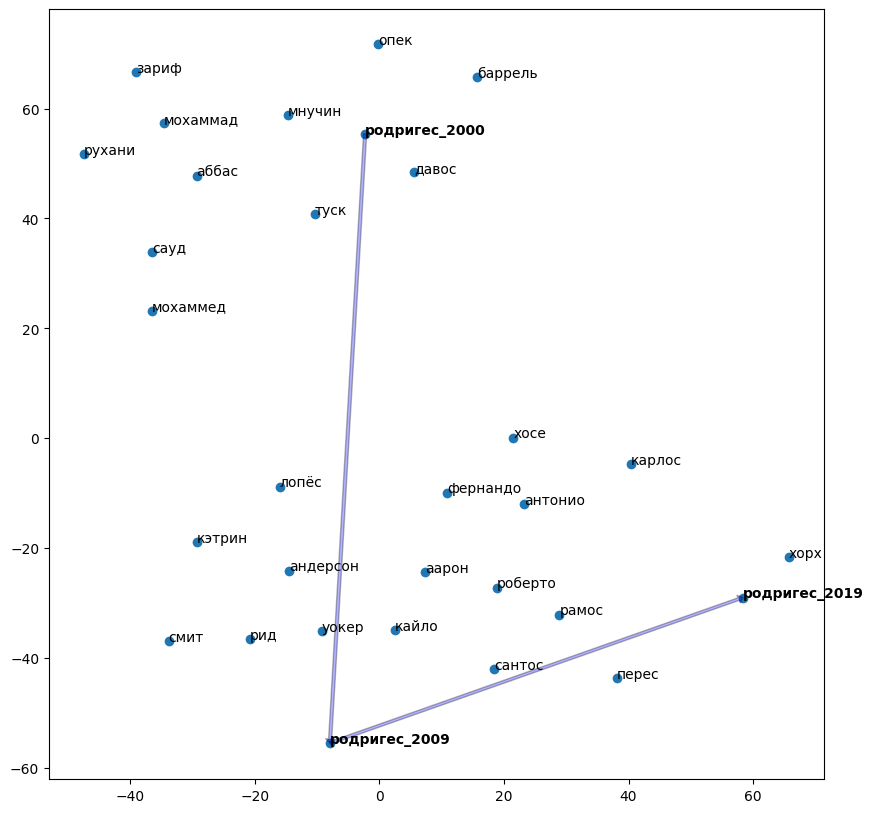

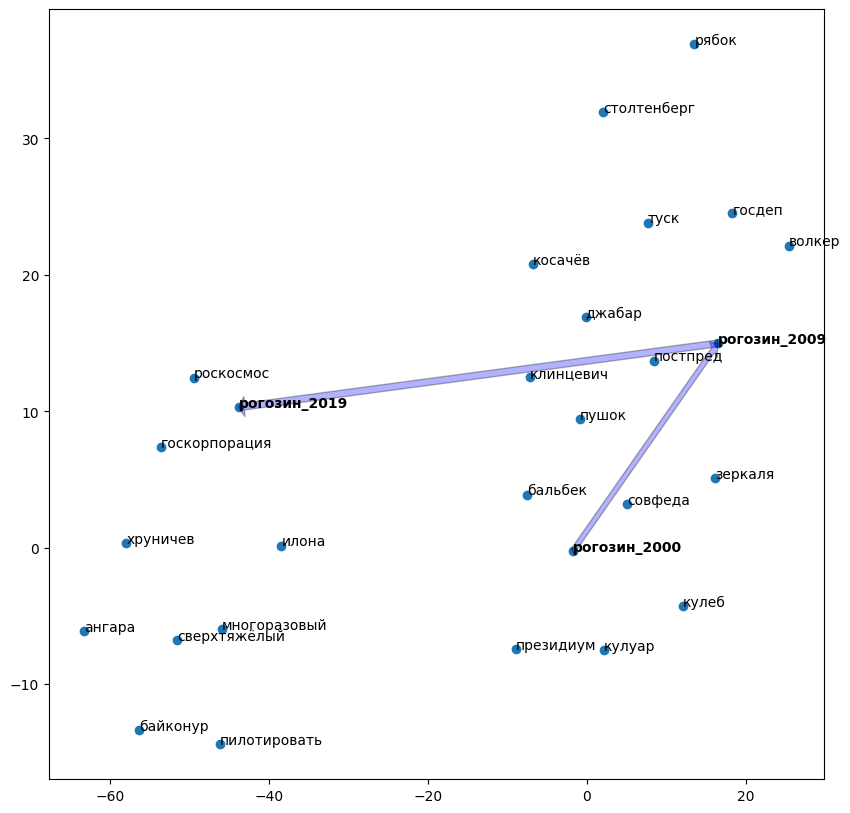

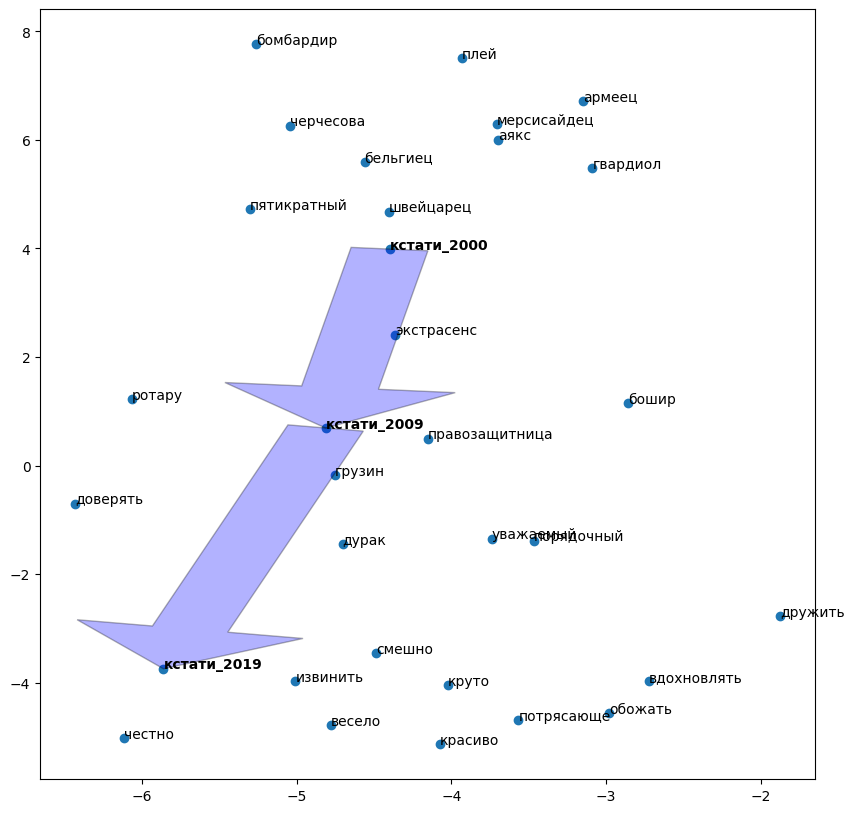

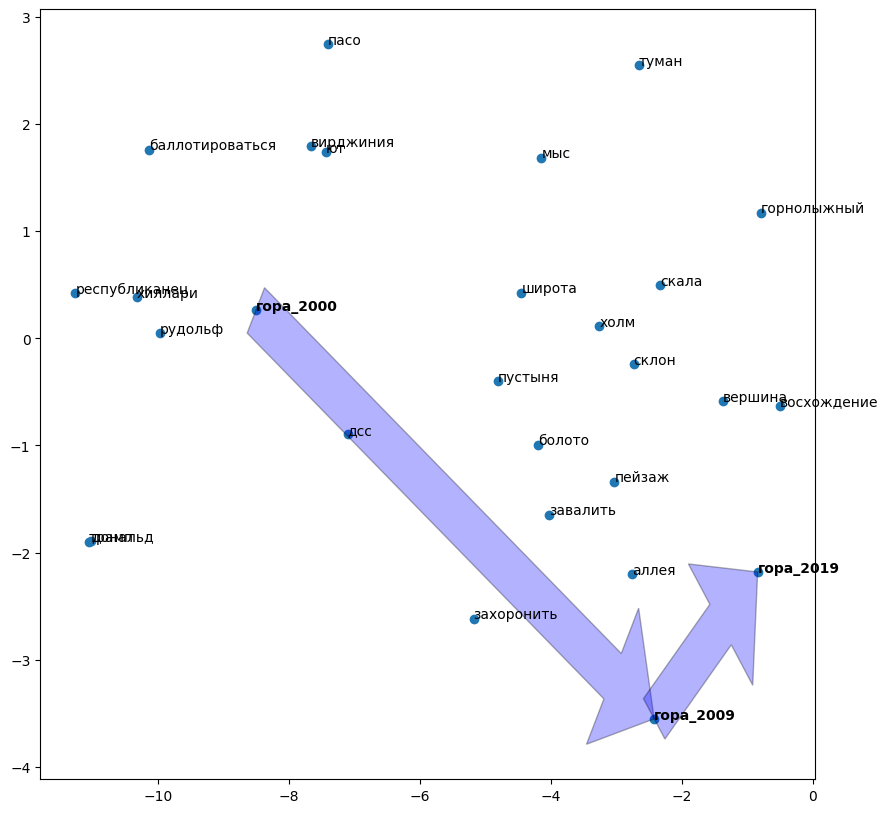

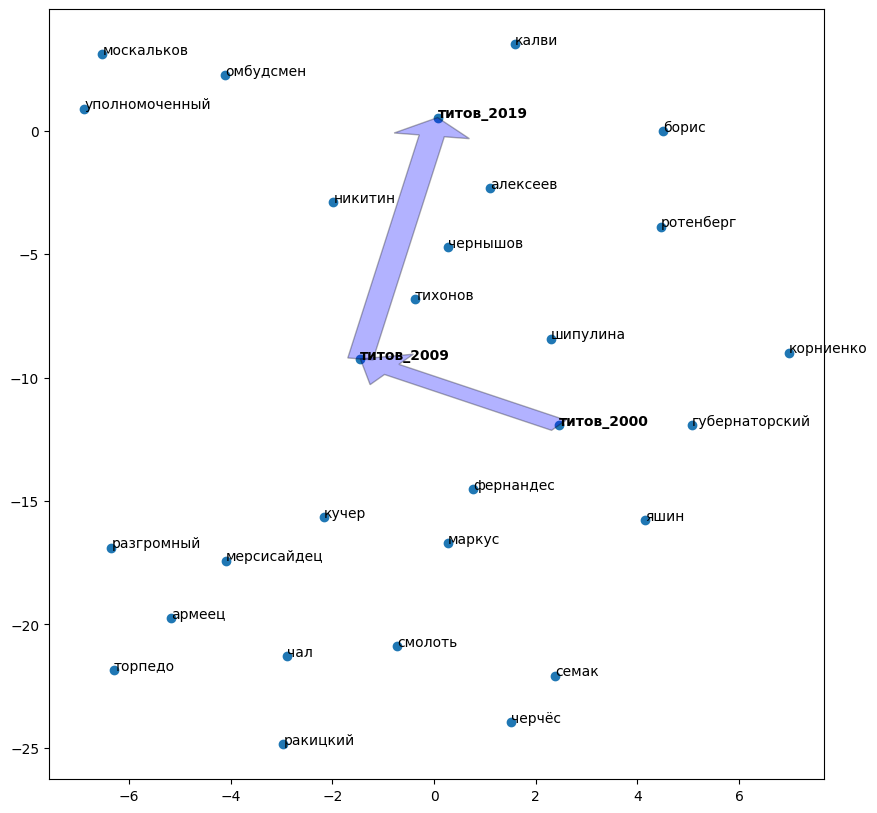

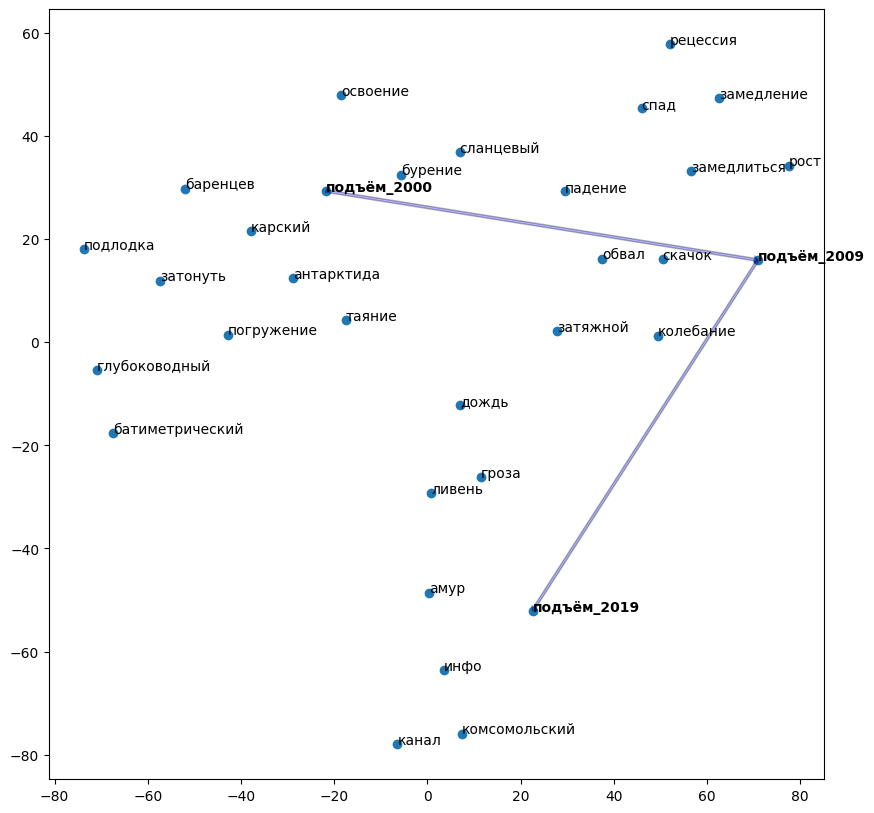

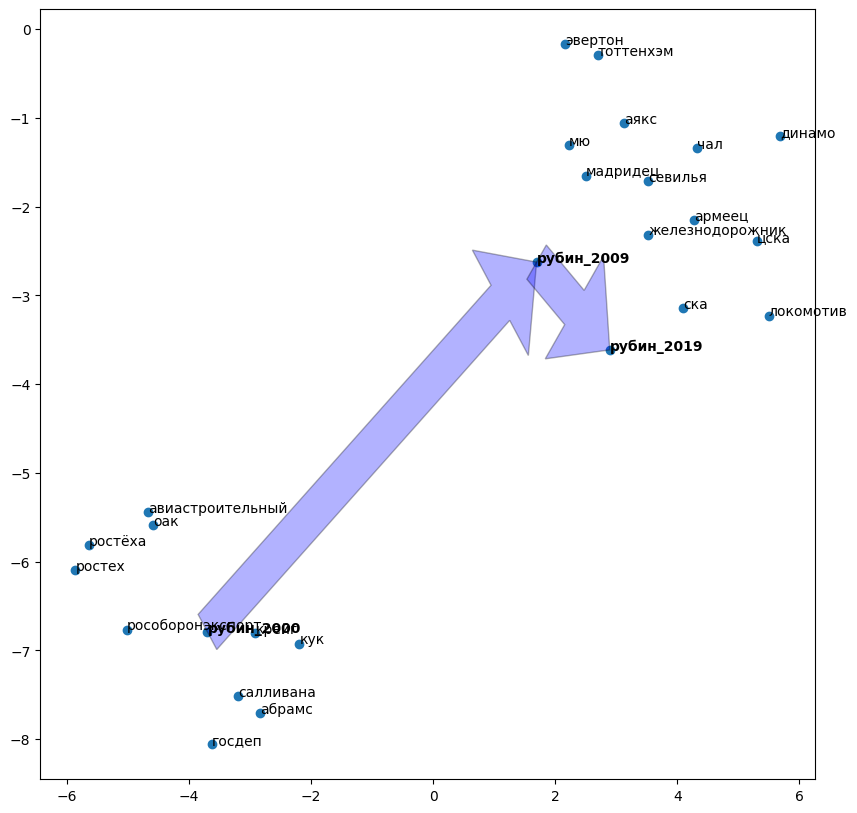

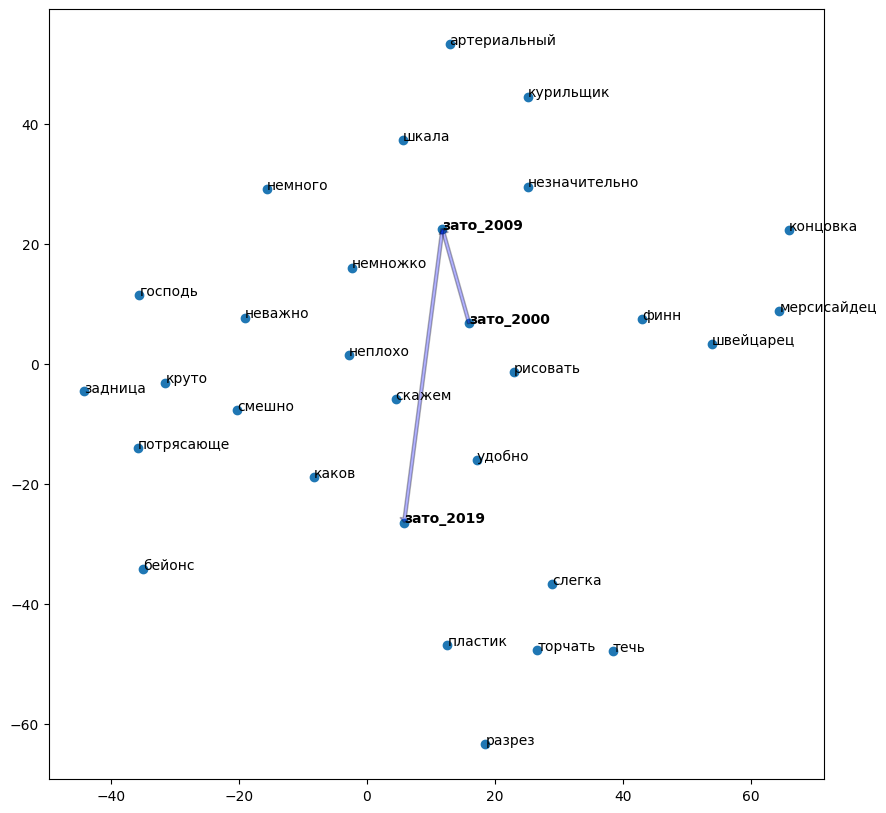

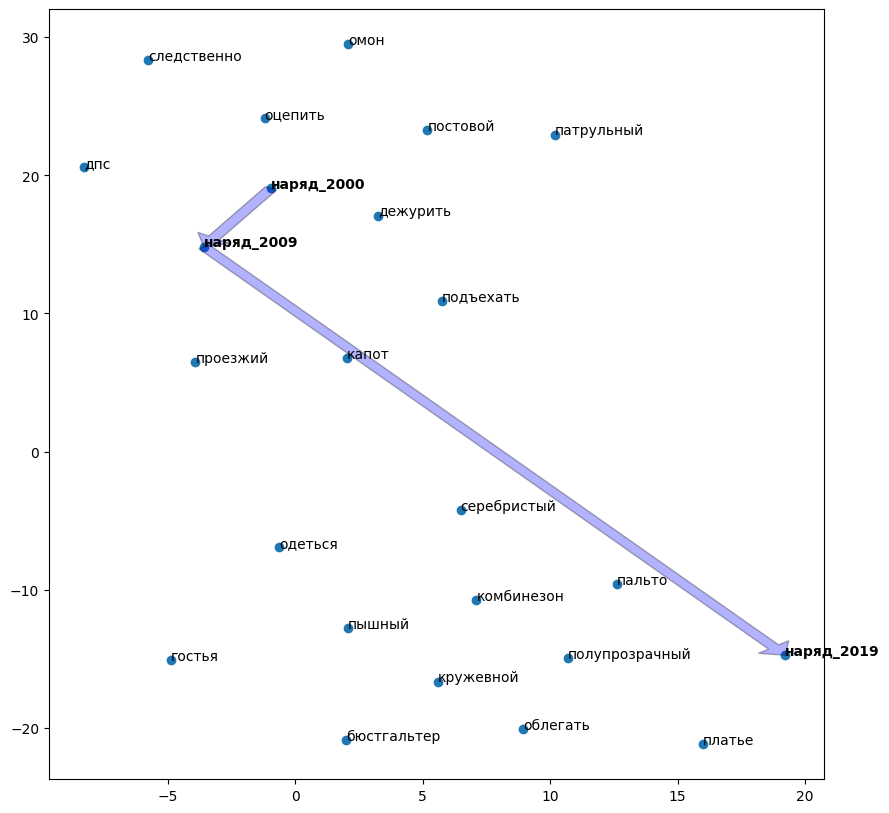

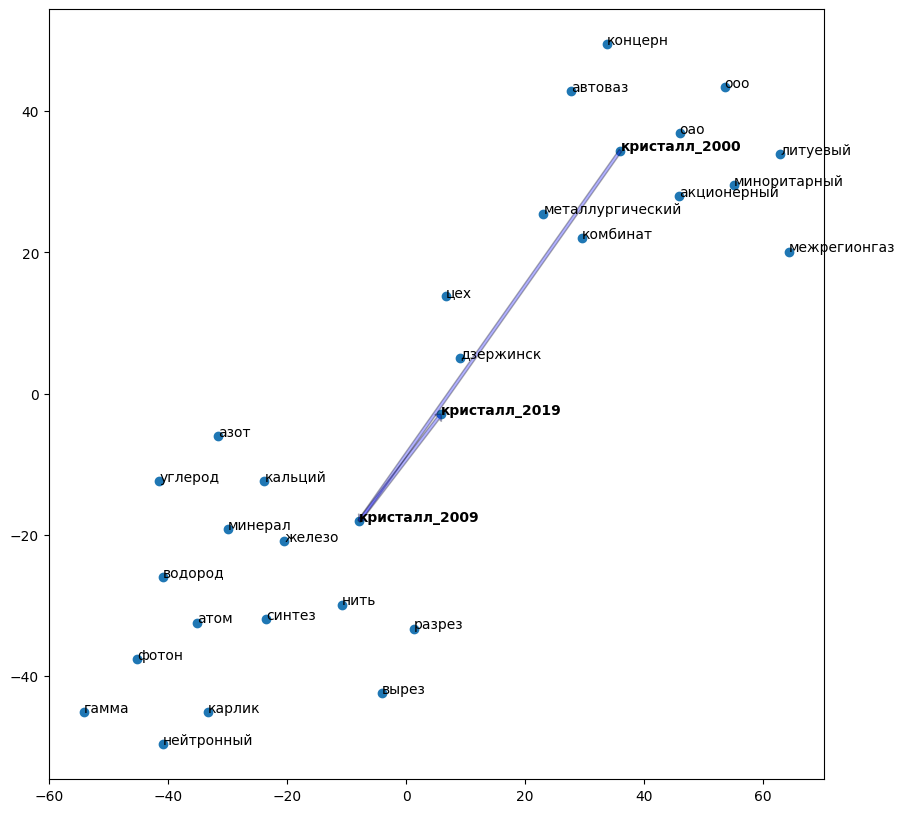

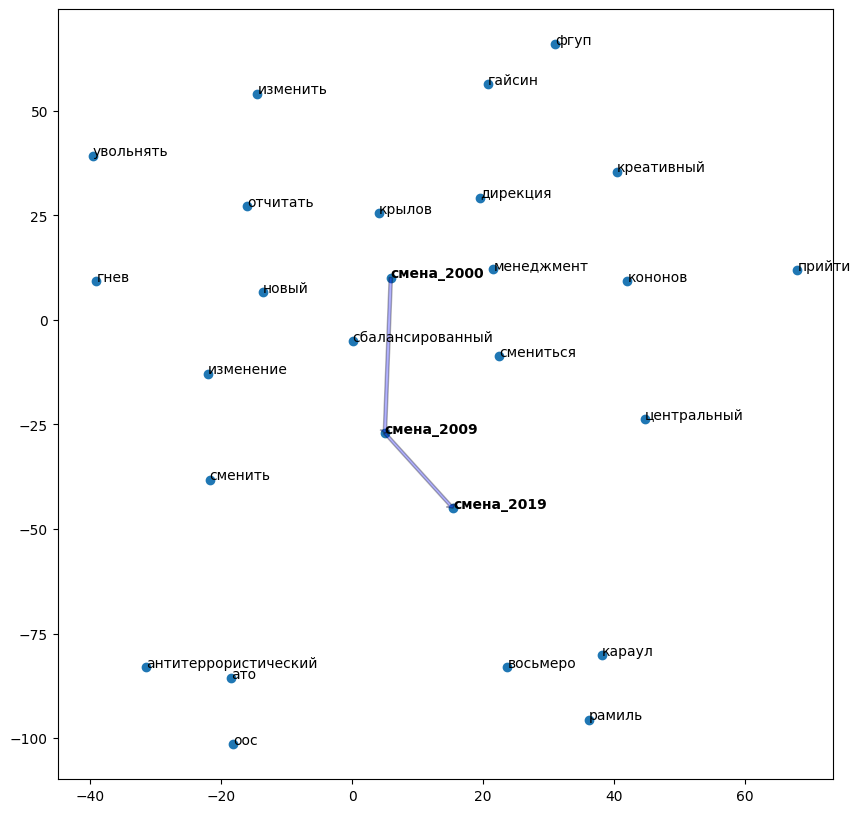

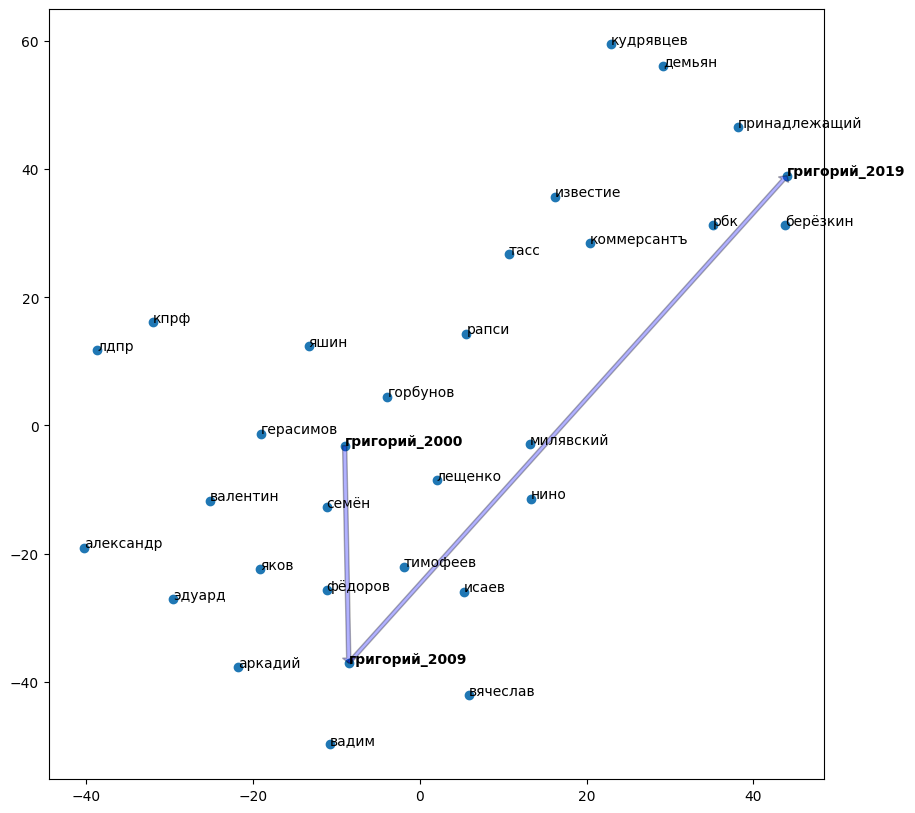

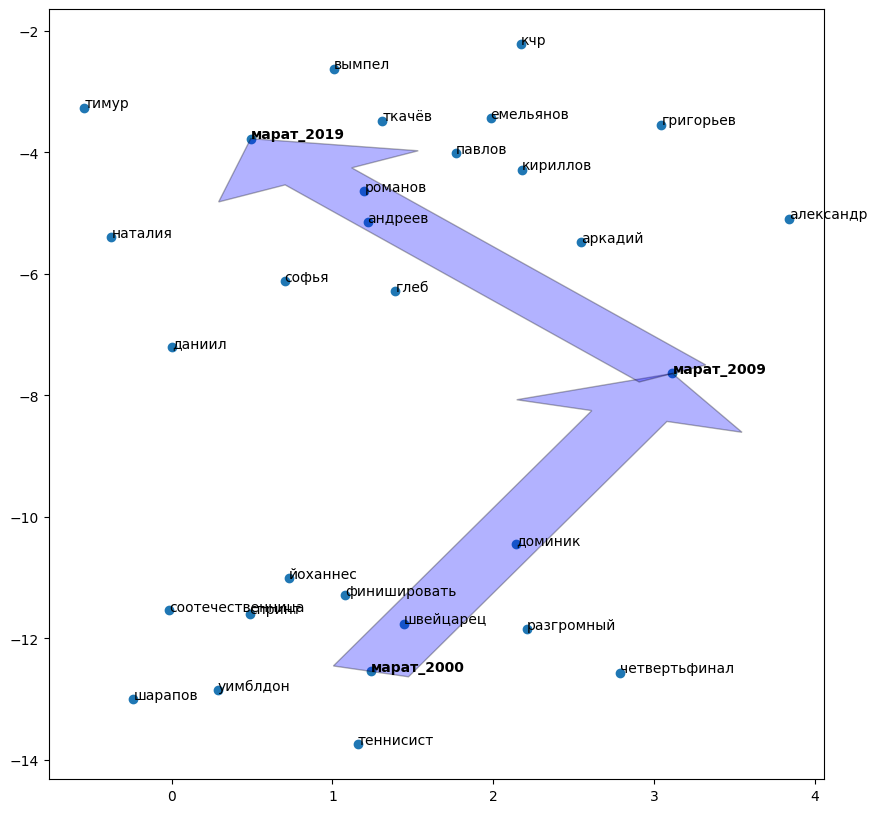

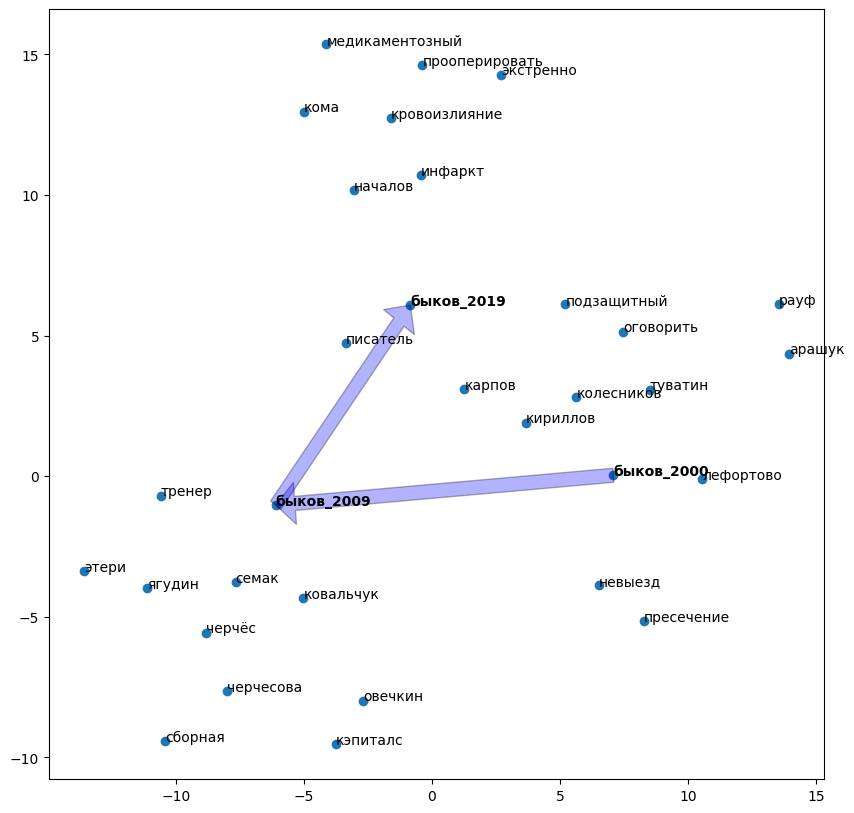

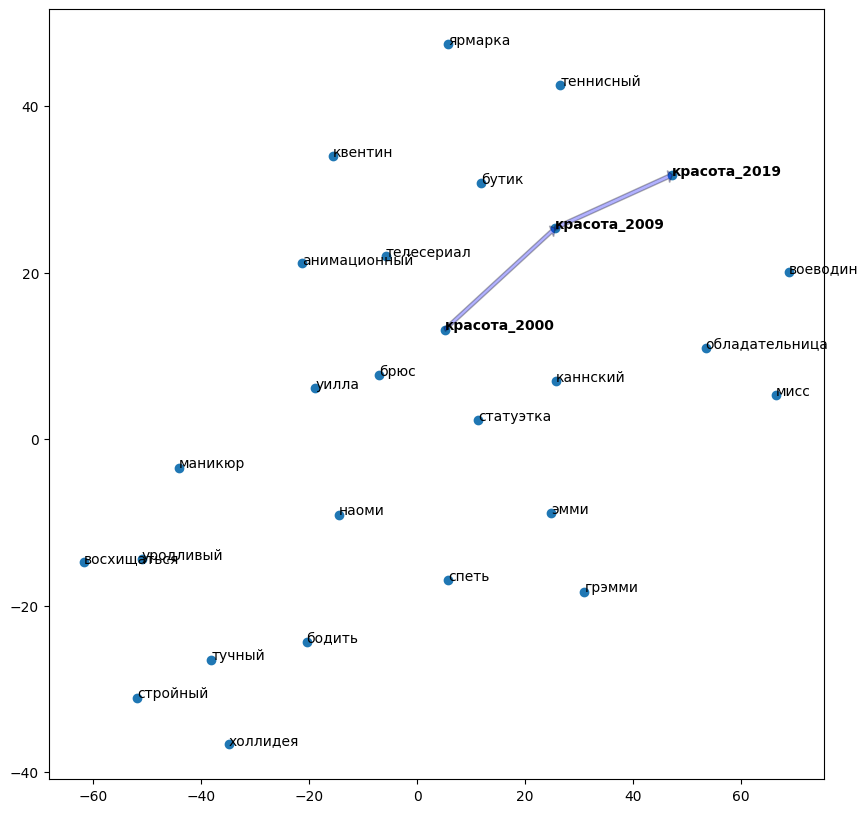

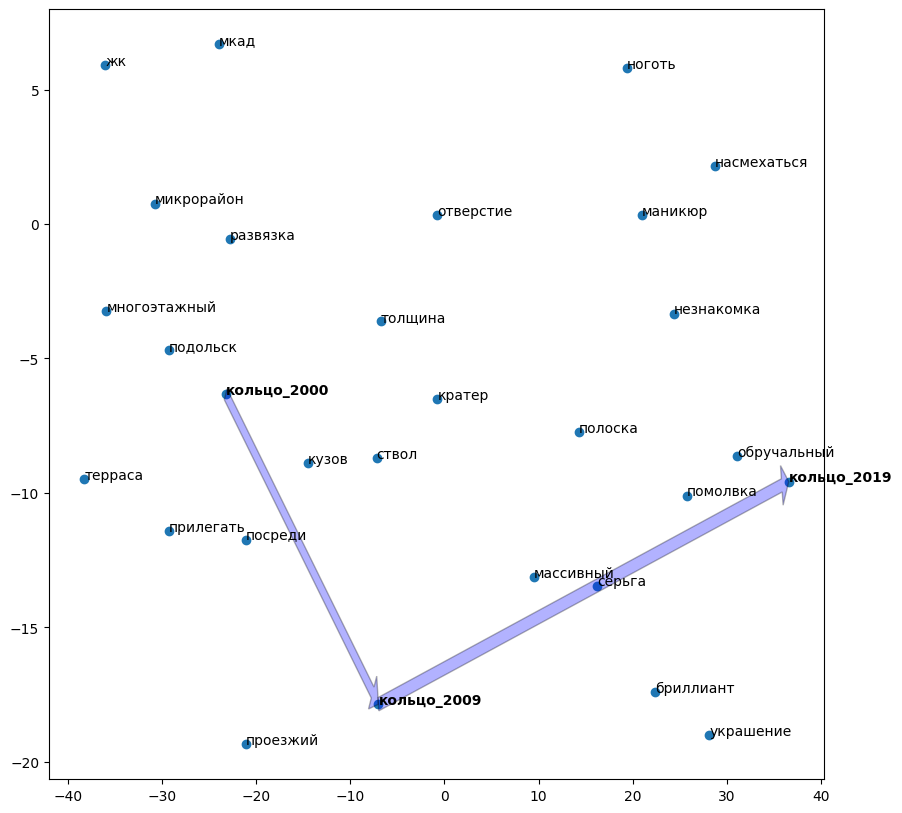

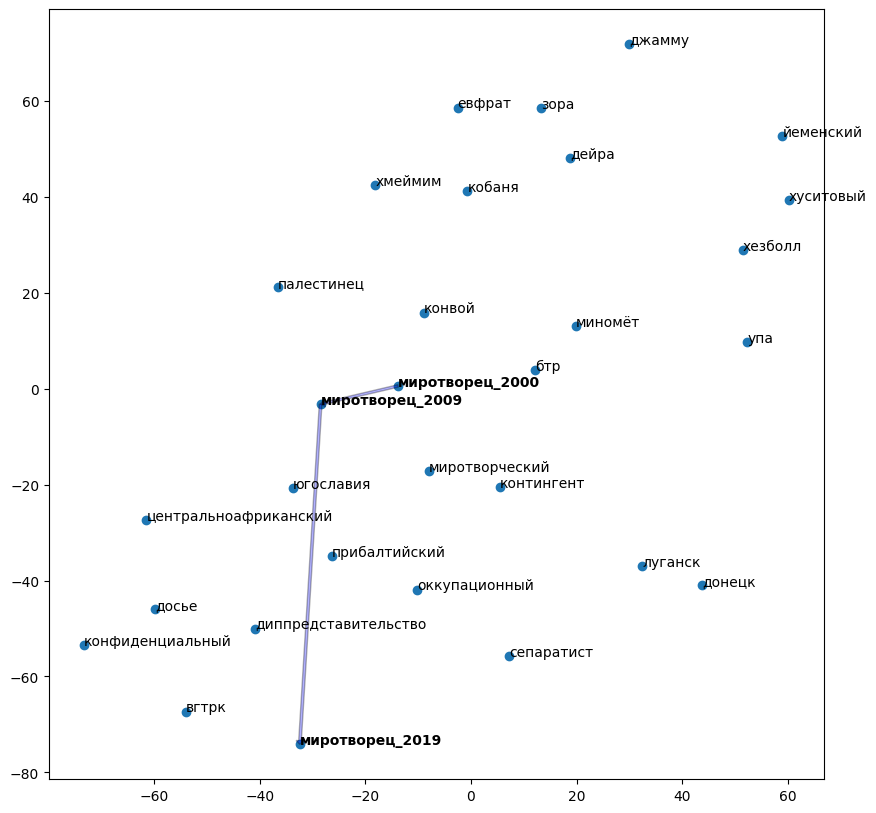

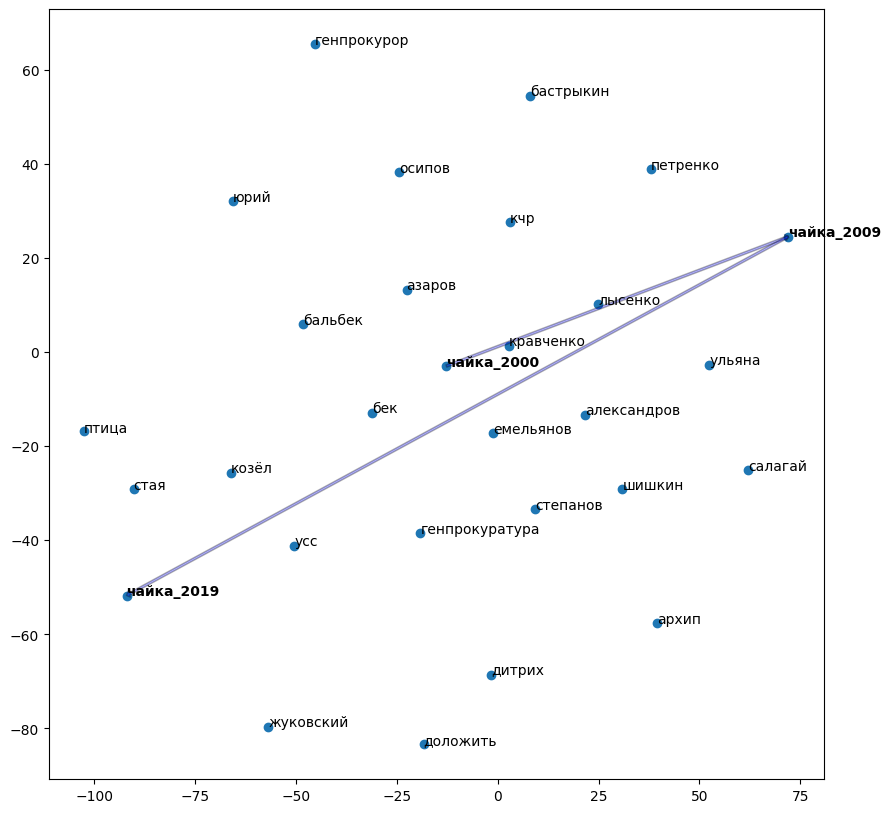

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm

words = [x[0] for x in top_20]
years = [2000, 2009, 2019]

model_2019 = Word2Vec.load('/content/gdrive/MyDrive/Colab Notebooks/Thesis/Models/News/Word2vec/word2vec_2019.model')
vectors = model_2019.wv

# Visualize semantic shifts
for word in tqdm(words):
    plt.figure(figsize=(10,10))
    plt.clf()
    key_word_embed = [model_2000_modified.wv[word],
                      model_2009_modified.wv[word],
                      vectors[word]]                  
    most_similar = {}
    for embed in key_word_embed:
        similars = [x[0] for x in vectors.most_similar(embed, topn=10)]
        for w in similars:
            if w == word:
                continue
            if w not in most_similar:
                w_embed = vectors[w]
                most_similar[w] = w_embed

    # Fit t-SNE
    keys = [key for key in most_similar.keys()]
    values = [most_similar[key] for key in keys]
    keys.extend([f'{word}_2000', f'{word}_2009', f'{word}_2019'])
    values.extend(key_word_embed)
    mat = np.array(values)
    model = TSNE(n_components=2, random_state=0, init='pca', perplexity=10)
    fitted = model.fit_transform(mat)

    x = fitted[:, 0]
    y = fitted[:, 1]
    plt.scatter(x, y)

    for i, txt in enumerate(keys):
        if len(keys) - i <= 3:
            plt.annotate(txt, (x[i], y[i]), weight='bold')
        else:
            plt.annotate(txt, (x[i], y[i]))
        

    plt.arrow(fitted[-3, 0], fitted[-3, 1], (fitted[-2, 0] - fitted[-3, 0]), 
              (fitted[-2, 1] - fitted[-3, 1]), facecolor='blue', alpha=0.3, width=0.5, 
              head_length=0.75, length_includes_head=True)
    plt.arrow(fitted[-2, 0], fitted[-2, 1], (fitted[-1, 0] - fitted[-2, 0]), 
              (fitted[-1, 1] - fitted[-2, 1]), facecolor='blue', alpha=0.3, width=0.5,
              head_length=0.75, length_includes_head=True)
    
    plt.show()

100%|██████████| 3/3 [00:00<00:00,  3.85it/s]


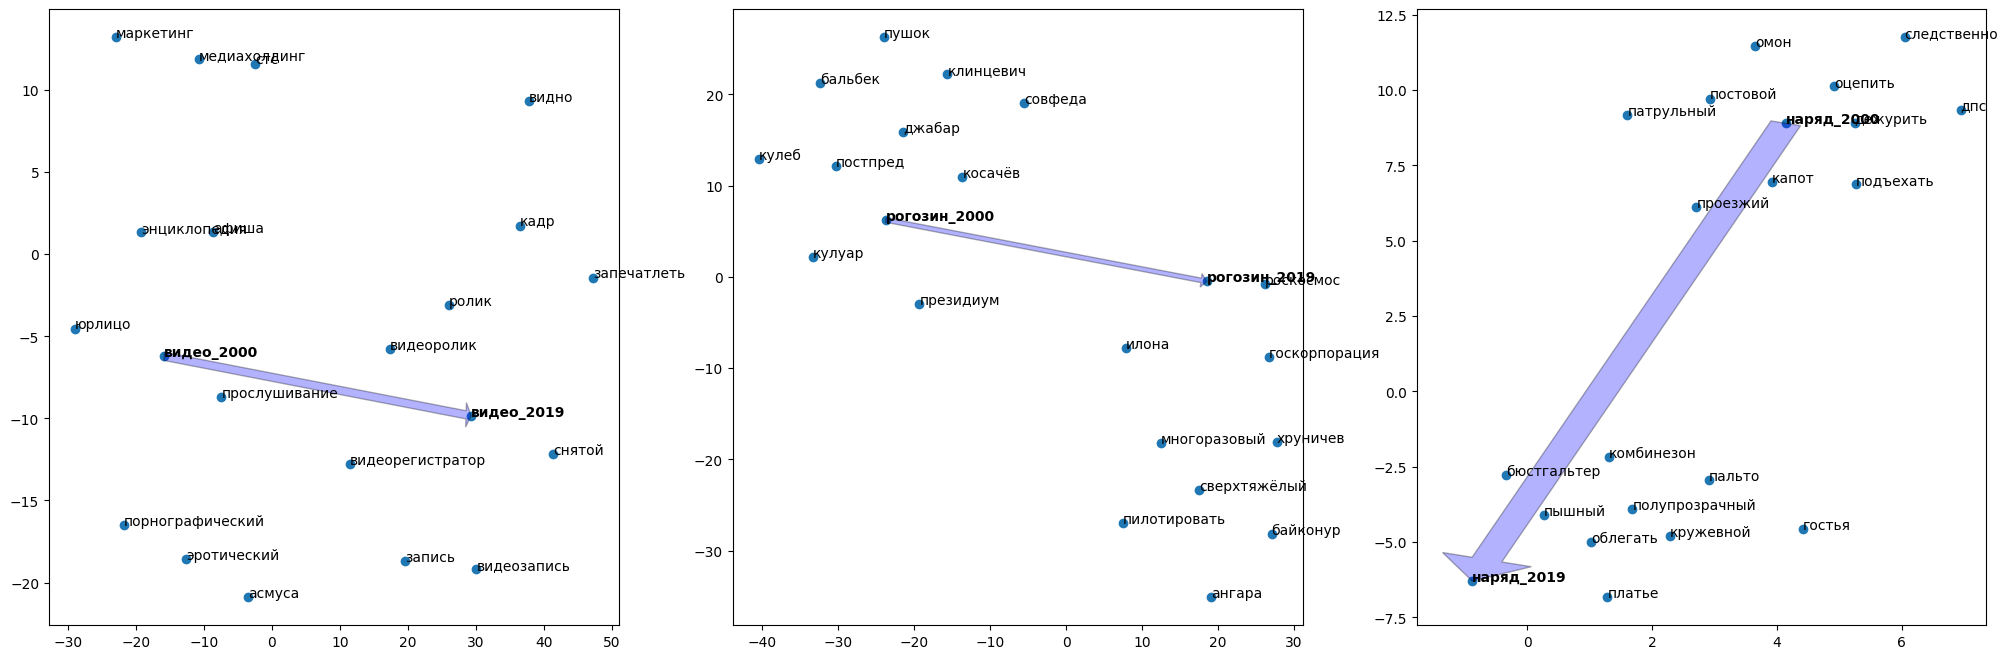

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm

words = ['видео', 'рогозин', 'наряд']
years = [2000, 2019]

model_2019 = Word2Vec.load('/content/gdrive/MyDrive/Colab Notebooks/Thesis/Models/News/Word2vec/word2vec_2019.model')
vectors = model_2019.wv

points = []
all_keys = []

for word in tqdm(words):
    key_word_embed = [model_2000_modified.wv[word],
                      vectors[word]]                  
    most_similar = {}
    for embed in key_word_embed:
        similars = [x[0] for x in vectors.most_similar(embed, topn=10)]
        for w in similars:
            if w == word:
                continue
            if w not in most_similar:
                w_embed = vectors[w]
                most_similar[w] = w_embed

    # Fit t-SNE
    keys = [key for key in most_similar.keys()]
    values = [most_similar[key] for key in keys]
    keys.extend([f'{word}_2000', f'{word}_2019'])
    values.extend(key_word_embed)
    mat = np.array(values)
    model = TSNE(n_components=2, random_state=0, init='pca', perplexity=10)
    fitted = model.fit_transform(mat)
    points.append(fitted)
    all_keys.append(keys)

fig, ax = plt.subplots(1, 3)

fig.set_figheight(8)
fig.set_figwidth(25)

for j in range(3):
    fitted = points[j]
    x = fitted[:, 0]
    y = fitted[:, 1]
    keys = all_keys[j]

    ax[j].scatter(x, y)

    for i, txt in enumerate(keys):
        if len(keys) - i <= 2:
            ax[j].annotate(txt, (x[i], y[i]), weight='bold')
        else:
            ax[j].annotate(txt, (x[i], y[i]))
    
    ax[j].arrow(fitted[-2, 0], fitted[-2, 1], (fitted[-1, 0] - fitted[-2, 0]), 
              (fitted[-1, 1] - fitted[-2, 1]), facecolor='blue', alpha=0.3, width=0.5,
              head_length=0.75, length_includes_head=True)
fig.savefig(f'/content/gdrive/MyDrive/Colab Notebooks/Thesis/Vectors/news_w2v.png')